# Vulnerability in the Philippines (In the context of Tropical Cyclones)

A known problem of the Philippines context is the spatial opposing gradients for hazard and vulnerability. This 
challenges decision making for aid allocation. In this notebook, the aim is to understand the characteristics of 
vulnerability in the Philippines. [How and why?]

## The Dataset(s)

We have two datasets to compare. One includes income classes on municipalities and the original dataset from 510. The former
has some missing observations on the income classes which lowers
the sample size by a number of municipalities.

In [37]:
# libaries for handling data and visualization
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_boxplot, labs, theme_minimal, geom_bar, stat_summary, geom_density, ggtitle, xlab, ylab
import matplotlib.pyplot as plt # ggplot does not have radar charts.
import os

In [4]:
# loading combined_input_data (base dataframe)
path_base_df = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/data/combined_input_data.csv'

base_df = pd.read_csv(path_base_df, header = 0)

base_df.head(3)

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,VUL_StrongRoof_SalvageWall,VUL_LightRoof_StrongWall,VUL_LightRoof_LightWall,VUL_LightRoof_SalvageWall,VUL_SalvagedRoof_StrongWall,VUL_SalvagedRoof_LightWall,VUL_SalvagedRoof_SalvageWall,VUL_vulnerable_groups,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg
0,PH175101000,durian2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,0.097425,2.533055,41.892832,1.002088,0.000000,0.027836,0.083507,2.951511,46.931106,3.632568
1,PH030801000,durian2006,28.487500,1.893750,1.070833,23.402905,136.527982,0.78,40.87,40.80,...,0.118842,0.248487,2.182368,0.000000,0.000000,0.010804,0.010804,0.867603,8.967156,NaN
2,PH083701000,durian2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,0.850008,1.218595,13.645253,0.549120,0.030089,0.090266,0.112833,3.338873,25.989168,NaN


In [6]:
# loading inc-base

path_inc_base_df = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/data/base_inc_data.csv'

base_inc_df =  pd.read_csv(path_inc_base_df, header = 0)

base_inc_df.head(3)

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,VUL_vulnerable_groups,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg,Mun_Code_2,Unnamed: 0,Municipality,10 Digit Code,Correspondence Code,Income Class,Population(2020 Census)
0,PH175101000,durian2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,2.951511,46.931106,3.632568,175101000,522.0,Abra De Ilog,1.705101e+09,175101000.0,2nd,35176.0
1,PH030801000,durian2006,28.487500,1.893750,1.070833,23.402905,136.527982,0.78,40.87,40.80,...,0.867603,8.967156,NaN,30801000,281.0,Abucay,3.008010e+08,30801000.0,3rd,42984.0
2,PH083701000,durian2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,3.338873,25.989168,NaN,83701000,949.0,Abuyog,8.037010e+08,83701000.0,1st*,61216.0


In [8]:
# data correction 
# remove * in income class
## * only means this particular municipality was not reclassified under 
## Department Order No 23-08 due to incomplete data.
base_inc_df['Income Class'] = base_inc_df['Income Class'].str.replace('*', '', regex = False)
base_inc_df.head(3)

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,VUL_vulnerable_groups,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg,Mun_Code_2,Unnamed: 0,Municipality,10 Digit Code,Correspondence Code,Income Class,Population(2020 Census)
0,PH175101000,durian2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,2.951511,46.931106,3.632568,175101000,522.0,Abra De Ilog,1.705101e+09,175101000.0,2nd,35176.0
1,PH030801000,durian2006,28.487500,1.893750,1.070833,23.402905,136.527982,0.78,40.87,40.80,...,0.867603,8.967156,NaN,30801000,281.0,Abucay,3.008010e+08,30801000.0,3rd,42984.0
2,PH083701000,durian2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,3.338873,25.989168,NaN,83701000,949.0,Abuyog,8.037010e+08,83701000.0,1st,61216.0


## Distribution of damage among the income classes

/var/folders/zd/tq81lwcs071f2tq5fwm9l4vw0000gn/T/ipykernel_7356/2944827328.py:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/homebrew/anaconda3/envs/py3-12-5/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 21302 rows containing non-finite values.


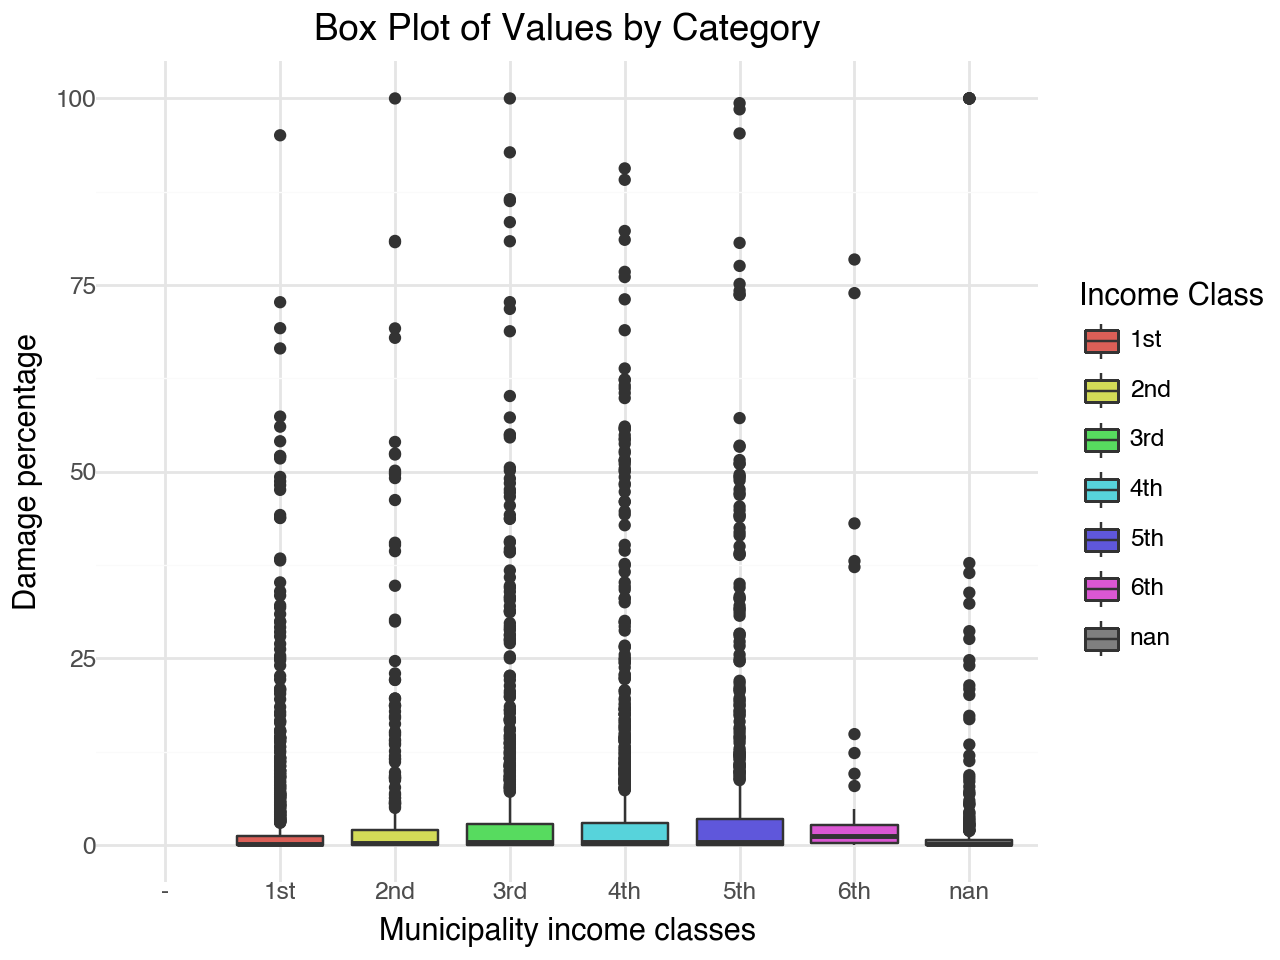

In [40]:
# Create the box plot
plot = (ggplot(base_inc_df, aes(x='Income Class', y='DAM_perc_dmg', fill='Income Class')) +
        geom_boxplot() +
        labs(title='Box Plot of Values by Category',
             x='Municipality income classes',
             y='Damage percentage') +
        theme_minimal())

# Display the plot
print(plot)

/var/folders/zd/tq81lwcs071f2tq5fwm9l4vw0000gn/T/ipykernel_7356/1114297317.py:24: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


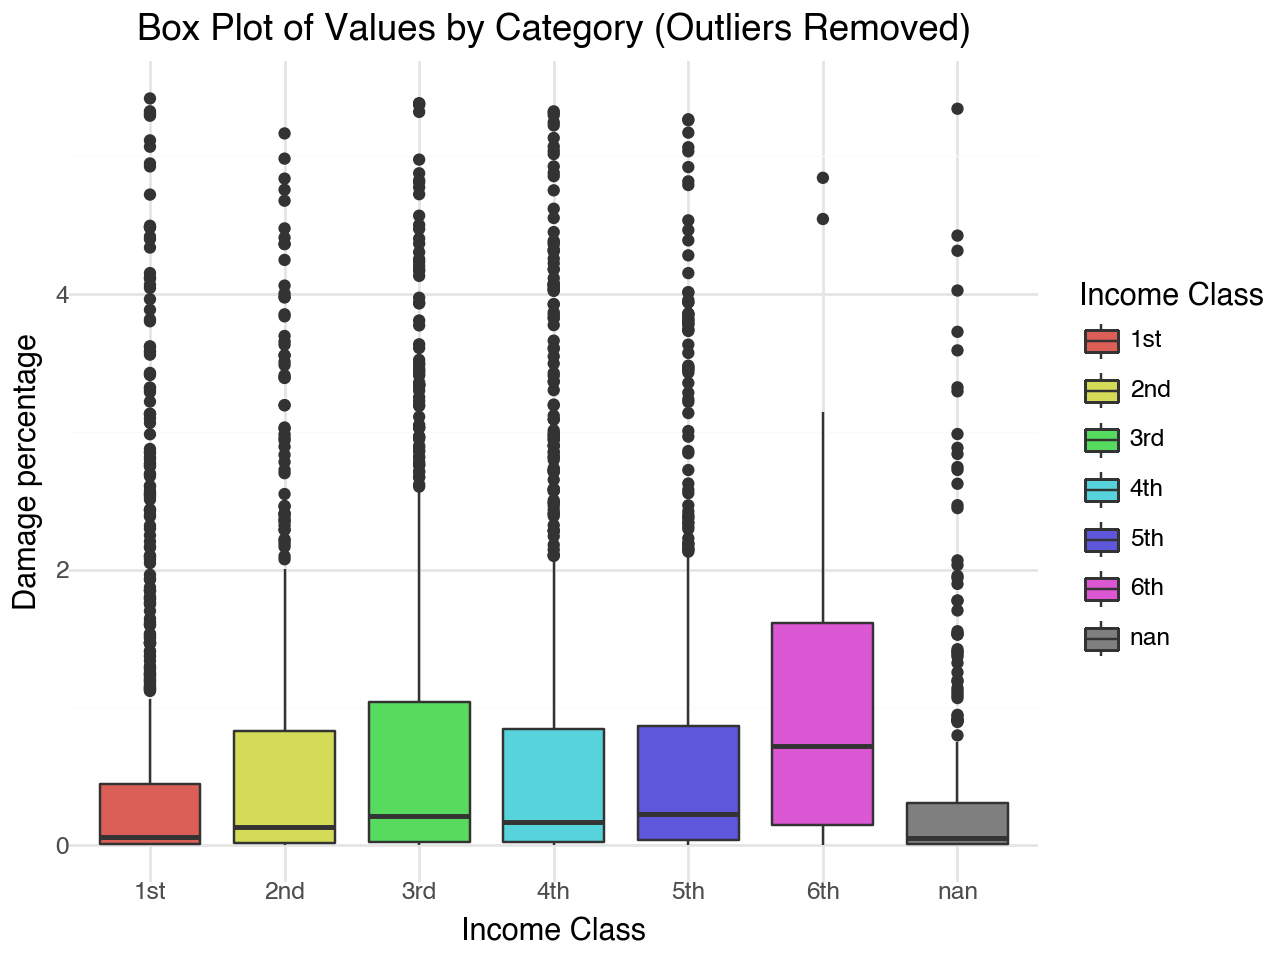

In [38]:
# boxplot without the outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = base_inc_df['DAM_perc_dmg'].quantile(0.25)
Q3 = base_inc_df['DAM_perc_dmg'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = base_inc_df[(base_inc_df['DAM_perc_dmg'] >= lower_bound) & (base_inc_df['DAM_perc_dmg'] <= upper_bound)]

# Create the box plot without outliers
plot = (ggplot(filtered_data, aes(x='Income Class', y='DAM_perc_dmg', fill='Income Class')) +
        geom_boxplot() +
        labs(title='Box Plot of Values by Category (Outliers Removed)',
             x='Income Class',
             y='Damage percentage') +
        theme_minimal())

# Display the plot
print(plot)

## Frequency of tropical cyclones in the municipality income classes

In [47]:
# number of tropical cyclone events...
num_tcs = base_inc_df['typhoon'].nunique()

# Print the results
print(f"Unique observations in column A: {num_tcs}")

Unique observations in column A: 40


/var/folders/zd/tq81lwcs071f2tq5fwm9l4vw0000gn/T/ipykernel_7356/617264692.py:17: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


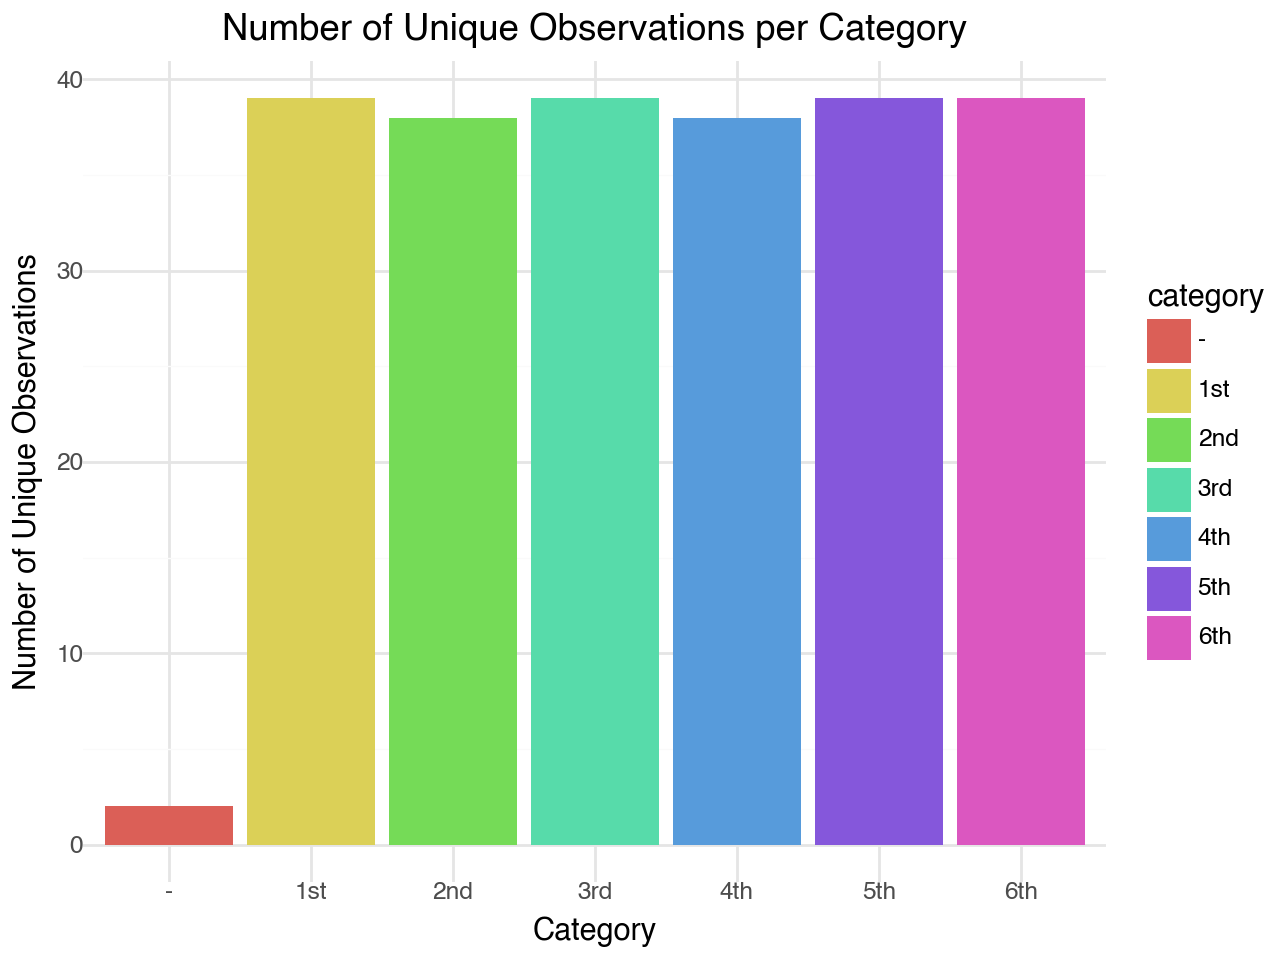

In [57]:
# Count unique observations per category
unique_counts = base_inc_df.groupby('Income Class')['typhoon'].nunique().reset_index()


# Rename the columns for clarity
unique_counts.columns = ['category', 'unique_count']

# Create the bar plot
plot = (ggplot(unique_counts, aes(x='category', y='unique_count', fill='category')) +
        geom_bar(stat='identity') +
        labs(title='Number of Unique Observations per Category',
             x='Category',
             y='Number of Unique Observations') +
        theme_minimal())

# Display the plot
print(plot)

The bar plot above shows that each income class had just about the same number of
TC events.

## Bar plots to try and understand severity (charactersitics) across income classes.

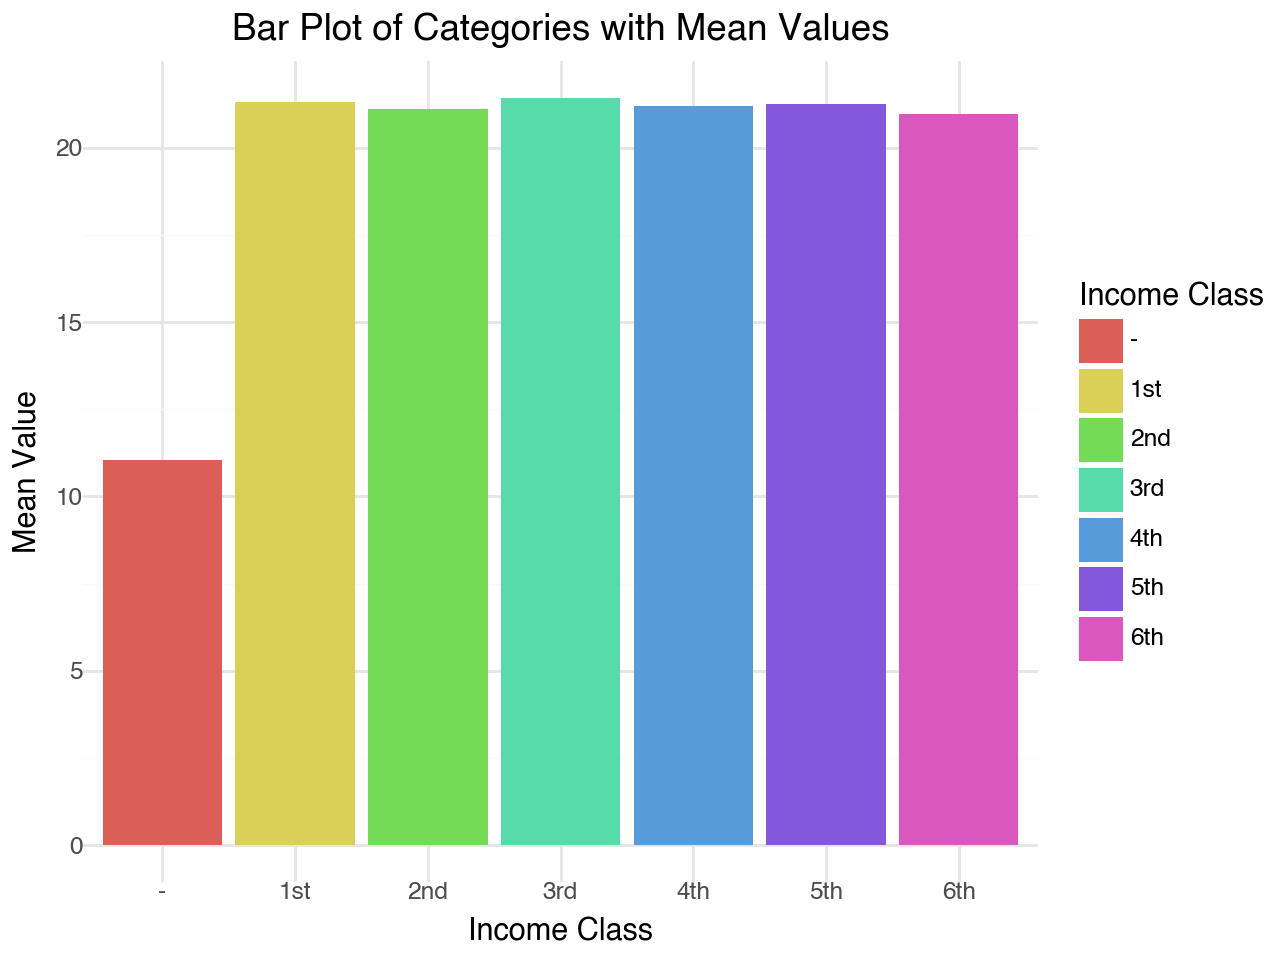

In [98]:
### PLOT DOES NOT MAKE SENSE
# Create a bar plot with the x-axis as a categorical variable and y-axis as a mean
# Summarize by mean for 'Category' and 'Group'
df_mean = base_inc_df.groupby(['Income Class'])['HAZ_v_max'].mean().reset_index()

plot = (ggplot(df_mean, aes(x='Income Class', y='HAZ_v_max', fill = 'Income Class')) +
        geom_bar(stat='identity',  position='dodge') +
       labs(title='Bar Plot of Categories with Mean Values',
             x='Income Class',
             y='Mean Value') +
       theme_minimal())

# Display the plot
plot.show()

Conclusion: Grouping municipalities by income classes in this doesn't tell us much... does it?

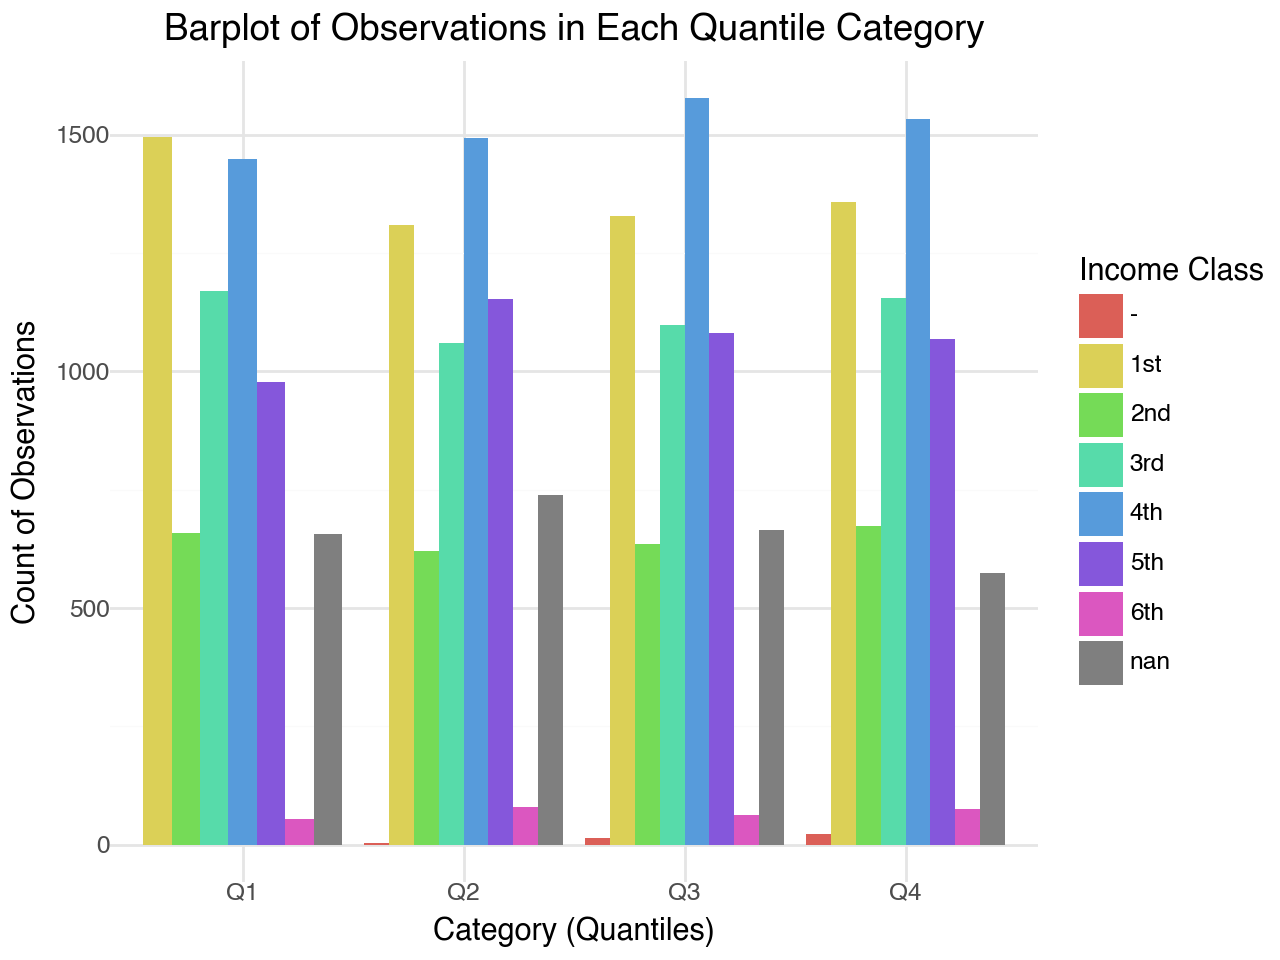

In [127]:
# cut distance into 4 categories based on quantile.
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Create a DataFrame from the sample data
#df = pd.DataFrame(data)

# Create categories using quantiles
base_inc_df['distQ'] = pd.qcut(base_inc_df['HAZ_dis_track_min'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Create a bar plot counting the number of observations in each category
plot = (ggplot(base_inc_df, aes(x ='distQ', fill = 'Income Class')) +
        geom_bar(position='dodge') +
        labs(title='Barplot of Observations in Each Quantile Category',
             x='Category (Quantiles)', y='Count of Observations') +
        theme_minimal())

# Show the plot
plot.show()

In [121]:
base_inc_df.head(10)

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg,Mun_Code_2,Unnamed: 0,Municipality,10 Digit Code,Correspondence Code,Income Class,Population(2020 Census),distQ
0,PH175101000,durian2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,46.931106,3.632568,175101000,522.0,Abra De Ilog,1.705101e+09,175101000.0,2nd,35176.0,Q1
1,PH030801000,durian2006,28.487500,1.893750,1.070833,23.402905,136.527982,0.78,40.87,40.80,...,8.967156,NaN,30801000,281.0,Abucay,3.008010e+08,30801000.0,3rd,42984.0,Q2
2,PH083701000,durian2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,25.989168,NaN,83701000,949.0,Abuyog,8.037010e+08,83701000.0,1st,61216.0,Q4
3,PH045601000,durian2006,193.083333,13.283333,7.378472,52.891105,41.386956,3.53,2.77,2.77,...,18.821293,NaN,45601000,464.0,Agdangan,4.056010e+08,45601000.0,5th,12764.0,Q1
4,PH015501000,durian2006,24.175000,2.408333,0.957639,10.945624,274.953818,1.52,1.28,1.28,...,32.185651,NaN,15501000,148.0,Agno,1.055010e+08,15501000.0,3rd,29947.0,Q4
5,PH041001000,durian2006,112.300000,8.154167,4.392708,51.137175,47.461548,0.44,0.02,0.02,...,18.741993,NaN,41001000,396.0,Agoncillo,4.010010e+08,41001000.0,4th,39101.0,Q1
6,PH015502000,durian2006,14.930000,1.650000,0.586250,12.108701,252.828578,0.00,0.00,0.00,...,29.612385,NaN,15502000,149.0,Aguilar,1.055020e+08,15502000.0,3rd,45100.0,Q4
7,PH175302000,durian2006,13.550000,1.054167,0.528125,10.660943,258.194381,5.52,0.36,0.36,...,35.052562,NaN,175302000,548.0,Agutaya,1.705302e+09,175302000.0,5th,12867.0,Q4
8,PH063001000,durian2006,24.243750,2.075000,0.677604,8.676614,259.252104,0.23,0.00,0.00,...,24.601217,NaN,63001000,745.0,Ajuy,6.030010e+08,63001000.0,2nd,53462.0,Q4
9,PH045602000,durian2006,172.316667,12.147222,5.927778,36.574351,69.147636,3.78,15.33,15.30,...,21.022888,NaN,45602000,465.0,Alabat,4.056020e+08,45602000.0,5th,15936.0,Q1


## A regional perspective to vulnerability

### Regional Data

Regional data (corresponding code and names) are obtained from the statistics office website: https://psa.gov.ph/classification/psgc. Using the **way-back machine** for a snapshot of the year *19th June 2020*. Particularly the 
file named *PSGC Publication March2020.xlsx*. The file is small so we enter the data manually.

In [10]:
# extract ADM2_EN, ADM2_PCODE, ADM1_EN, and ADM1_PCODE

# Sample DataFrame
regions_DF = pd.DataFrame({
    'code': ['1300000000', '1400000000', '0100000000', '0200000000', '0300000000', '0400000000', 
             '1700000000', '0500000000', '0600000000', '0700000000',
            '0800000000', '0900000000', '1000000000', '1100000000', '1200000000',
            '1600000000', '1500000000'],
    'region': ['National Capital Region (NCR)', 'Cordillera Administrative Region (CAR)', 
               'Region I (Ilocos Region)', 'Region II (Cagayan Valley)', 'Region III (Central Luzon)',
               'Region IV-A (CALABARZON)', 'MIMAROPA Region',
              'Region V (Bicol Region)', 'Region VI (Western Visayas)',
              'Region VII (Central Visayas)', 
               'Region VIII (Eastern Visayas)', 'Region IX (Zamboanga Peninsula)',
              'Region X (Northern Mindanao)', 'Region XI (Davao Region)', 
               'Region XII (SOCCSKSARGEN)', 'Region XIII (Caraga)', 
               'Autonomous Region in Muslim Mindanao (ARMM)']
})

# ensure datatypes maintain as strings
regions_DF[['code', 'region']] = regions_DF[['code', 'region']].astype('string')

print(regions_DF)

          code                                       region
0   1300000000                National Capital Region (NCR)
1   1400000000       Cordillera Administrative Region (CAR)
2   0100000000                     Region I (Ilocos Region)
3   0200000000                   Region II (Cagayan Valley)
4   0300000000                   Region III (Central Luzon)
5   0400000000                     Region IV-A (CALABARZON)
6   1700000000                              MIMAROPA Region
7   0500000000                      Region V (Bicol Region)
8   0600000000                  Region VI (Western Visayas)
9   0700000000                 Region VII (Central Visayas)
10  0800000000                Region VIII (Eastern Visayas)
11  0900000000              Region IX (Zamboanga Peninsula)
12  1000000000                 Region X (Northern Mindanao)
13  1100000000                     Region XI (Davao Region)
14  1200000000                    Region XII (SOCCSKSARGEN)
15  1600000000                         R

## Joining region data to base and income data.

Left join using the first two digits in the string in 'Mun_Code'

In [12]:
# making sure that the columns are of type strings
base_inc_df['Mun_Code'] = base_inc_df['Mun_Code'].astype('string')

In [14]:
# Left join by matching the first 7 characters of 'col1' from df1 and 'col2' from df2
base_inc_reg_DF = pd.merge(base_inc_df, regions_DF, left_on=base_inc_df['Mun_Code'].str[2:4], right_on=regions_DF['code'].str[0:2], how='left')

# Drop the unnecessary key columns created by the merge (optional)
base_inc_reg_DF = base_inc_reg_DF.drop(['key_0'], axis=1)

# Show the result
base_inc_reg_DF.head(5) 

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,DAM_perc_dmg,Mun_Code_2,Unnamed: 0,Municipality,10 Digit Code,Correspondence Code,Income Class,Population(2020 Census),code,region
0,PH175101000,durian2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,3.632568,175101000,522.0,Abra De Ilog,1.705101e+09,175101000.0,2nd,35176.0,1700000000,MIMAROPA Region
1,PH030801000,durian2006,28.487500,1.893750,1.070833,23.402905,136.527982,0.78,40.87,40.80,...,NaN,30801000,281.0,Abucay,3.008010e+08,30801000.0,3rd,42984.0,0300000000,Region III (Central Luzon)
2,PH083701000,durian2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,NaN,83701000,949.0,Abuyog,8.037010e+08,83701000.0,1st,61216.0,0800000000,Region VIII (Eastern Visayas)
3,PH045601000,durian2006,193.083333,13.283333,7.378472,52.891105,41.386956,3.53,2.77,2.77,...,NaN,45601000,464.0,Agdangan,4.056010e+08,45601000.0,5th,12764.0,0400000000,Region IV-A (CALABARZON)
4,PH015501000,durian2006,24.175000,2.408333,0.957639,10.945624,274.953818,1.52,1.28,1.28,...,NaN,15501000,148.0,Agno,1.055010e+08,15501000.0,3rd,29947.0,0100000000,Region I (Ilocos Region)


In [16]:
base_inc_reg_DF['region'].unique()

<StringArray>
[                            'MIMAROPA Region',
                  'Region III (Central Luzon)',
               'Region VIII (Eastern Visayas)',
                    'Region IV-A (CALABARZON)',
                    'Region I (Ilocos Region)',
                 'Region VI (Western Visayas)',
                  'Region II (Cagayan Valley)',
                     'Region V (Bicol Region)',
                'Region VII (Central Visayas)',
               'National Capital Region (NCR)',
      'Cordillera Administrative Region (CAR)',
                        'Region XIII (Caraga)',
                'Region X (Northern Mindanao)',
 'Autonomous Region in Muslim Mindanao (ARMM)',
                   'Region XII (SOCCSKSARGEN)',
             'Region IX (Zamboanga Peninsula)',
                    'Region XI (Davao Region)']
Length: 17, dtype: string

## Star plots: Vulnerability (Build Typologies)

Objective is to observe the distribution of vulnerability variables across the regions. We are looking for signs of opposing spatial gradients in terms of vulnerability.

In [20]:
# only for housing and buidling typology variables
selected_columns = ['VUL_StrongRoof_StrongWall',
       'VUL_StrongRoof_LightWall', 'VUL_StrongRoof_SalvageWall',
       'VUL_LightRoof_StrongWall', 'VUL_LightRoof_LightWall',
       'VUL_LightRoof_SalvageWall', 'VUL_SalvagedRoof_StrongWall',
       'VUL_SalvagedRoof_LightWall', 'VUL_SalvagedRoof_SalvageWall', 'region']




base_inc_reg_DF_typologies = base_inc_reg_DF[selected_columns]

In [24]:
# columns to visualize
viz_columns = ['VUL_StrongRoof_StrongWall',
       'VUL_StrongRoof_LightWall', 'VUL_StrongRoof_SalvageWall',
       'VUL_LightRoof_StrongWall', 'VUL_LightRoof_LightWall',
       'VUL_LightRoof_SalvageWall', 'VUL_SalvagedRoof_StrongWall',
       'VUL_SalvagedRoof_LightWall', 'VUL_SalvagedRoof_SalvageWall']

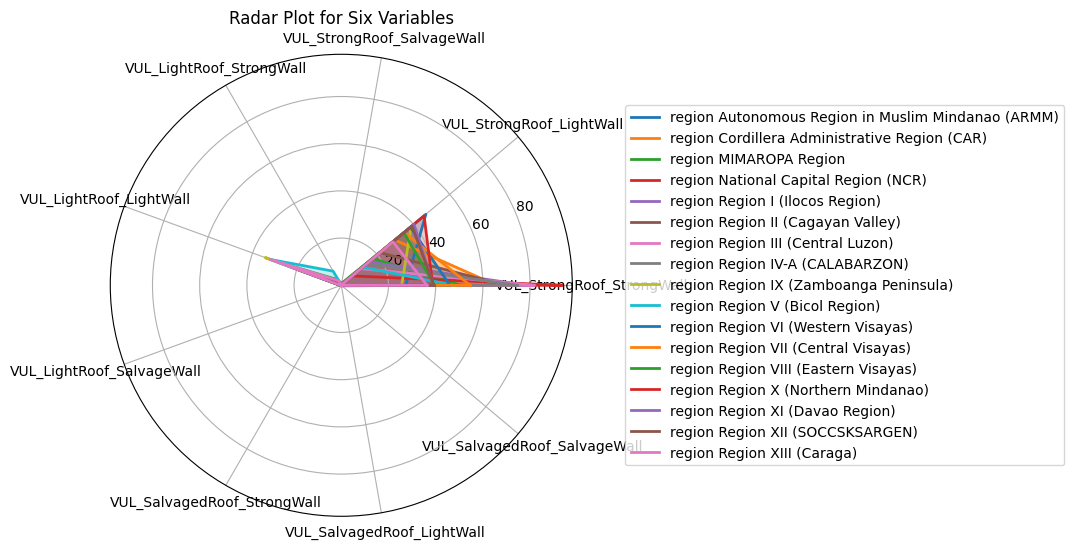

In [232]:

# Get mean by category
mean_by_category = base_inc_reg_DF_typologies.groupby('region').mean()


num_vars = len(viz_columns)

# Compute angles for radar plot (equally spaced, and add a final point for closure)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Initialize the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Function to plot radar chart
def plot_radar(values, label):
    values += values[:1]  # Add the first value to the end to close the loop
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, label=label, linewidth=2)

# Plot each row in the DataFrame (each observation)
for i, row in mean_by_category.iterrows():
    plot_radar(row.tolist(), label=f'region {i}')

# Set labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_columns)
#ax.set_xticklabels(metrics)

# Add title and legend
plt.title('Radar Plot for Six Variables')
# Move the legend to the extreme right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5)) 

# Show the plot
plt.show()

### By Regions: Cordillera Administrative Region (CAR) - NORTH

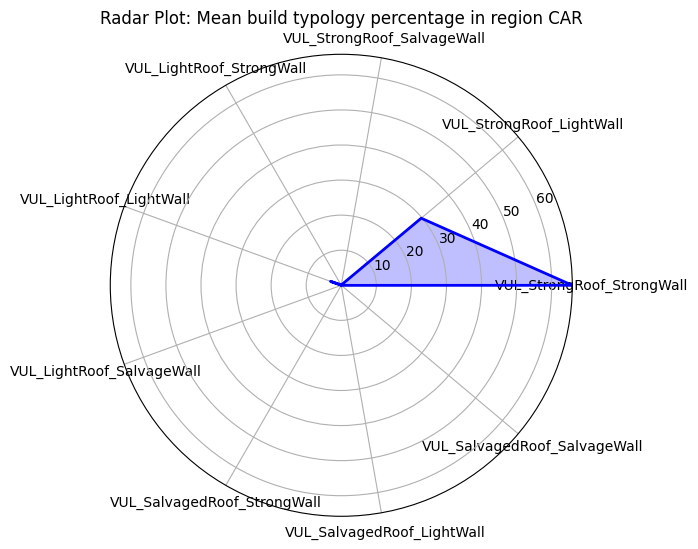

In [43]:
# Filter the DataFrame by a specific 'Cordillera Administrative Region (CAR)'

CAR_region = base_inc_reg_DF_typologies[base_inc_reg_DF_typologies['region'] == 'Cordillera Administrative Region (CAR)']

# get the mean across the variables
CAR_region_mean = CAR_region[viz_columns].mean()

num_vars = len(viz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = CAR_region_mean.tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, CAR_region_mean.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Mean build typology percentage in region CAR')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'car_vul_rad.png'
output_path_car_vul_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_car_vul_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

### By Regions: Region II (Cagayan Valley) - NORTH

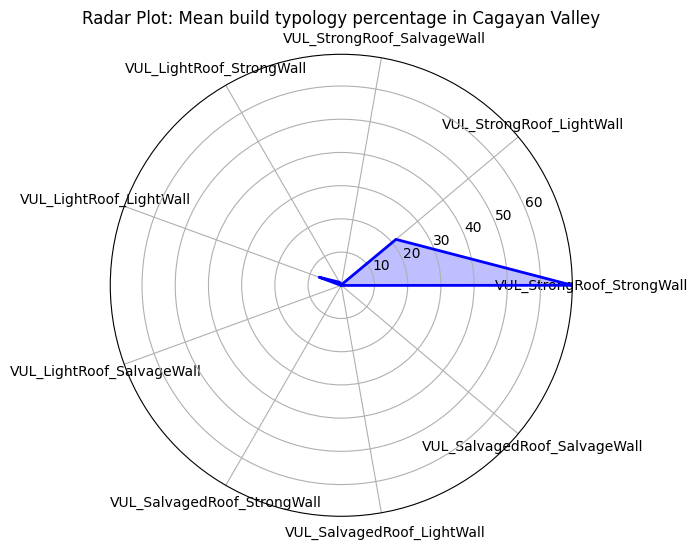

In [47]:
# Filter the DataFrame by a specific 'Cordillera Administrative Region (CAR)'

region_II = base_inc_reg_DF_typologies[base_inc_reg_DF_typologies['region'] == 'Region II (Cagayan Valley)']

# get the mean across the variables
region_II_mean = region_II[viz_columns].mean()

num_vars = len(viz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_II_mean.tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_II_mean.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Mean build typology percentage in Cagayan Valley')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'RII_vul_rad.png'
output_path_RII_vul_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_RII_vul_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

In [ ]:
### Region Ilocos - NORTH

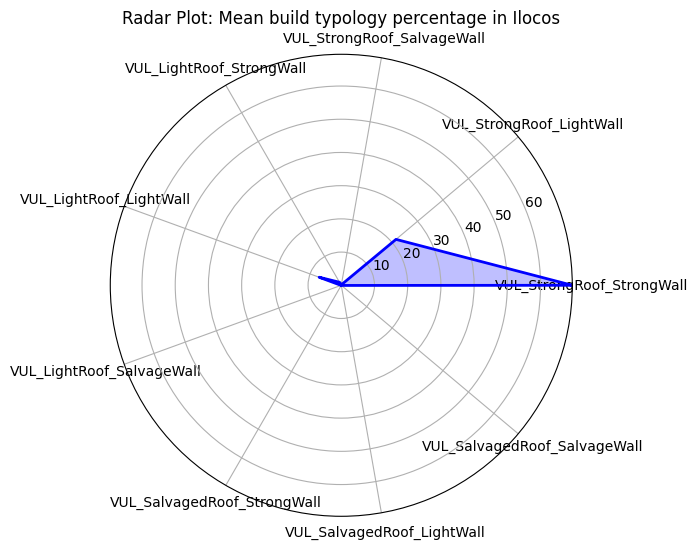

In [56]:
# Filter the DataFrame by a specific Region I (Ilocos Region)'

region_I = base_inc_reg_DF_typologies[base_inc_reg_DF_typologies['region'] == 'Region I (Ilocos Region)']

# get the mean across the variables
region_I_mean = region_II[viz_columns].mean()

num_vars = len(viz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_I_mean.tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_I_mean.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Mean build typology percentage in Ilocos')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'RI_vul_rad.png'
output_path_RI_vul_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_RI_vul_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

### Region Central Luzon - NORTH

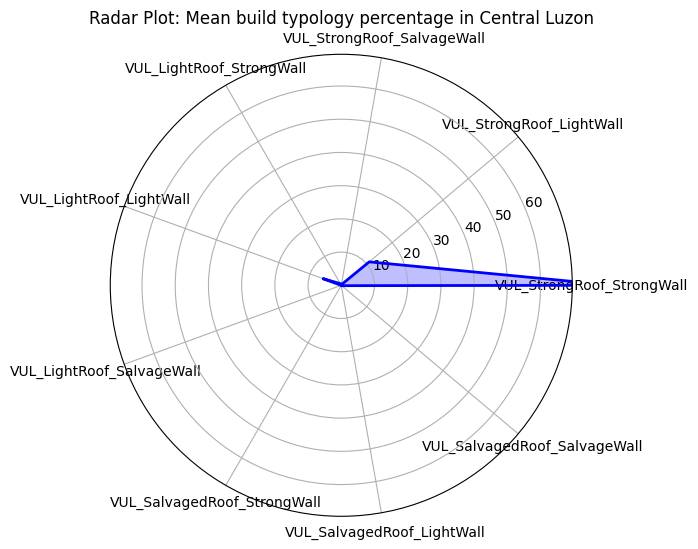

In [52]:


# Filter the DataFrame by a specific 'Region Ill (Central Luzon)'

region_III = base_inc_reg_DF_typologies[base_inc_reg_DF_typologies['region'] == 'Region III (Central Luzon)']

# get the mean across the variables
region_III_mean = region_III[viz_columns].mean()

num_vars = len(viz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_III_mean.tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_II_mean.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Mean build typology percentage in Central Luzon')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'RIII_vul_rad.png'
output_path_RIII_vul_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_RIII_vul_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

In [ ]:
### Region XII (SOCCSKSARGEN) - SOUTH

### By Regions: Region XII (SOCCSKSARGEN) - SOUTH

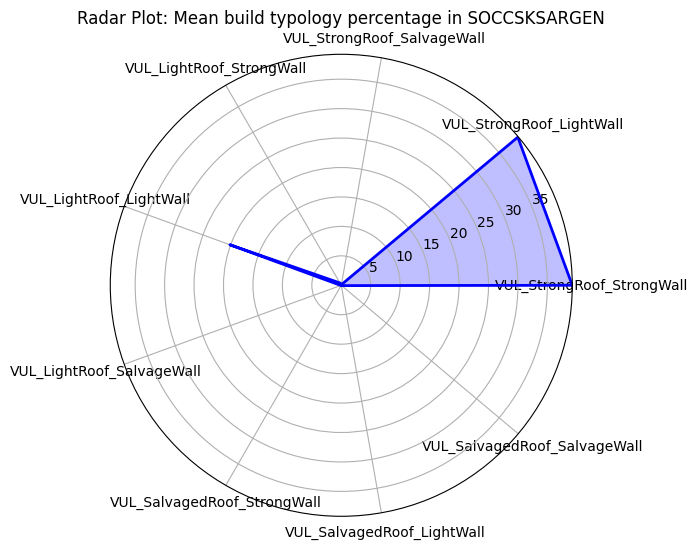

In [60]:
# Filter the DataFrame by a specific 'Region XII (SOCCSKSARGEN)'

region_XII = base_inc_reg_DF_typologies[base_inc_reg_DF_typologies['region'] == 'Region XII (SOCCSKSARGEN)']

# get the mean across the variables
region_XII_mean = region_XII[viz_columns].mean()

num_vars = len(viz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_XII_mean.tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_XII_mean.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Mean build typology percentage in SOCCSKSARGEN')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'S-region_XII_vul_rad.png'
output_path_XII_vul_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_XII_vul_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

### By Regions:  Region XI (Davao Region)

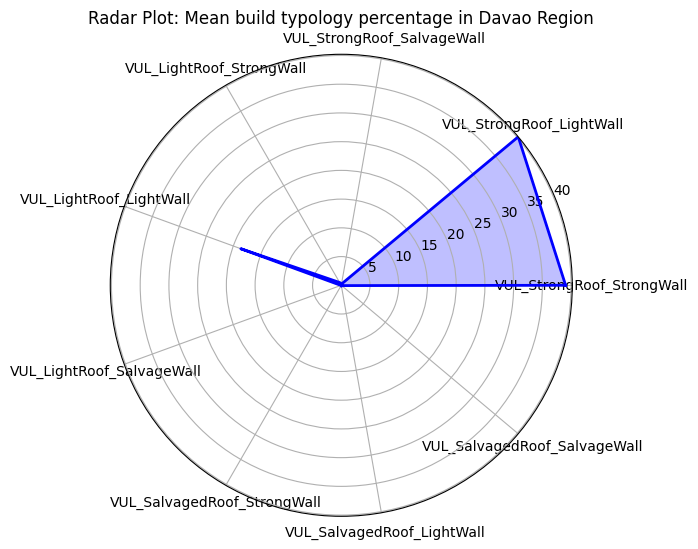

In [64]:
# Filter the DataFrame by a specific 

region_XI = base_inc_reg_DF_typologies[base_inc_reg_DF_typologies['region'] == 'Region XI (Davao Region)']

# get the mean across the variables
region_XI_mean = region_XI[viz_columns].mean()

num_vars = len(viz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_XI_mean.tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_XI_mean.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Mean build typology percentage in Davao Region')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'S- region_XI_vul_rad.png'
output_path_XI_vul_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_XI_vul_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

### By Regions:  Autonomous Region in Muslim Mindanao (ARMM)

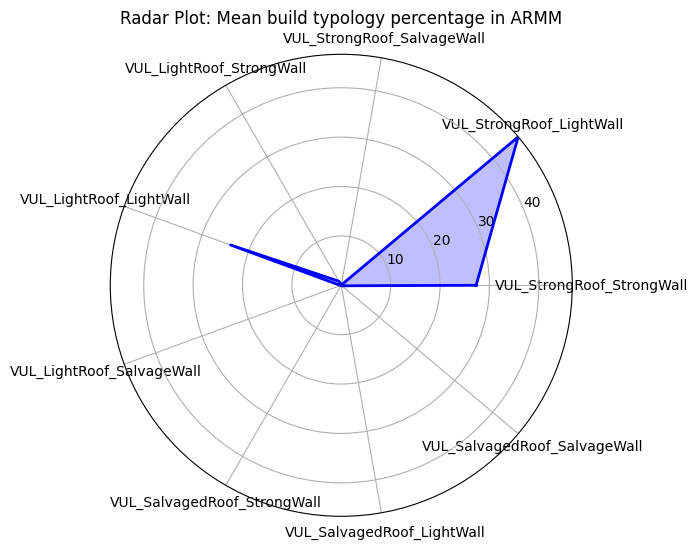

In [66]:
# Filter the DataFrame by a specific 

region_ARMM = base_inc_reg_DF_typologies[base_inc_reg_DF_typologies['region'] == 'Autonomous Region in Muslim Mindanao (ARMM)']

# get the mean across the variables
region_ARMM_mean = region_ARMM[viz_columns].mean()

num_vars = len(viz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_ARMM_mean.tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_ARMM_mean.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Mean build typology percentage in ARMM')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'S-region_ARMM_vul_rad.png'
output_path_ARMM_vul_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_ARMM_vul_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

### By Regions:  Region IX (Zamboanga Peninsula)

Text(0.5, 1.0, 'Radar Plot of Median Build typology percentage in Autonomous Region IX (Zamboanga Peninsula)')

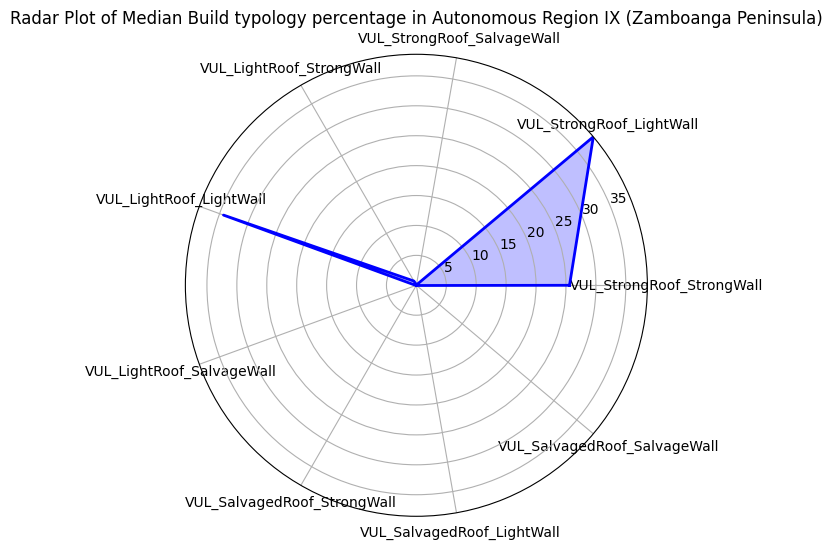

In [308]:
# Filter the DataFrame by a specific 

region_IX = base_inc_reg_DF_typologies[base_inc_reg_DF_typologies['region'] == 'Region IX (Zamboanga Peninsula)']

# get the mean across the variables
region_IX_mean = region_IX[viz_columns].mean()

num_vars = len(viz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_IX_mean.tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_IX_mean.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot of Median Build typology percentage in Autonomous Region IX (Zamboanga Peninsula)')

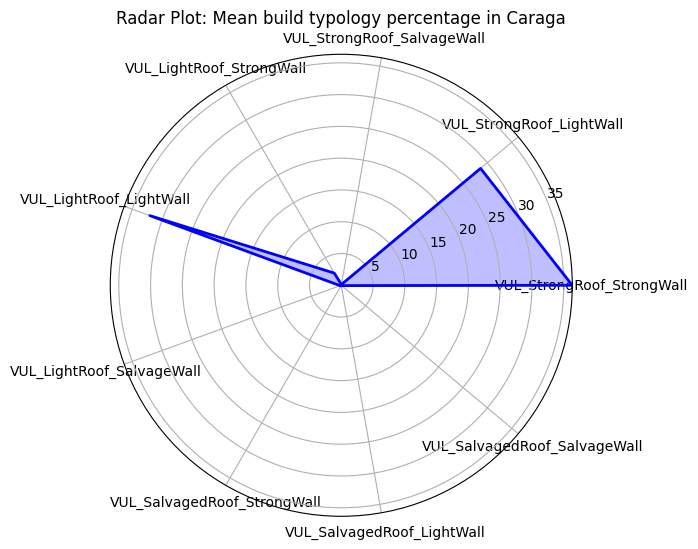

In [68]:
# Filter the DataFrame by a specific 

region_XIII = base_inc_reg_DF_typologies[base_inc_reg_DF_typologies['region'] == 'Region XIII (Caraga)']

# get the mean across the variables
region_XIII_mean = region_XIII[viz_columns].mean()

num_vars = len(viz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_XIII_mean.tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_XIII_mean.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Mean build typology percentage in Caraga')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'S-region_XIII_vul_rad.png'
output_path_region_XIII_vul_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_region_XIII_vul_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

## Star Plots: Hazards (Hazard components)

### Star: Plots Hazard components (From a persective of extremal Events)

In [70]:
# varaibles we are interested in

haz_columns = ['HAZ_rainfall_Total', 'HAZ_v_max', 'HAZ_rainfall_max_24h','region']

base_inc_Reg_Haz_DF = base_inc_reg_DF[haz_columns]

viz_haz_columns = ['HAZ_rainfall_Total', 'HAZ_v_max','HAZ_rainfall_max_24h']

Since we have observations of hazard components on all the municipalities, it is better to consider/ count only the extremal events
to see if there's a difference between northern and southern regions. We use quantiles to determine which event measurements are outliers then count them per-region.

In [88]:
def count_outliers(df):
    """
    Function to calculate the number of outliers for each column in a pandas DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numeric columns.

    Returns:
    pd.DataFrame: DataFrame with outlier counts for each column.
    """
    # Initialize an empty dictionary to store the count of outliers per column
    outlier_counts = {}

    # Iterate through each column
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Only process numeric columns
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Calculate the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Count the number of outliers (values outside the bounds)
            outliers =  (df[col] > upper_bound).sum()

            # Store the count in the dictionary
            outlier_counts[col] = outliers
        else:
            # If the column is non-numeric, set the count to NaN
            outlier_counts[col] = None

    # Convert the outlier counts to a DataFrame with the same column names
    outlier_df = pd.DataFrame(outlier_counts, index=['Outlier_Count'])

    return outlier_df

#### Northern Regions

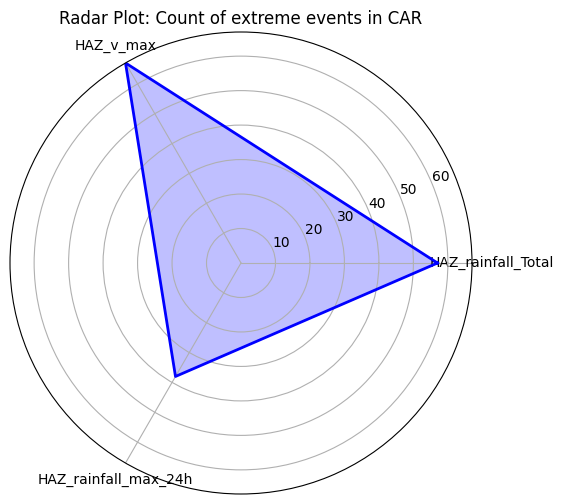

In [90]:
# Filter the DataFrame by a specific 'Cordillera Administrative Region (CAR)'

CAR_region_HZ = base_inc_Reg_Haz_DF[base_inc_Reg_Haz_DF['region'] == 'Cordillera Administrative Region (CAR)']

# get the outliers across the variables
CAR_region_Outliers = count_outliers(CAR_region_HZ[viz_haz_columns])

num_vars = len(viz_haz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = CAR_region_Outliers.iloc[0].tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_haz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, CAR_region_Outliers.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Count of extreme events in CAR')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'N-region_CAR_haz_rad.png'
output_path_region_CAR_haz_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_region_CAR_haz_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

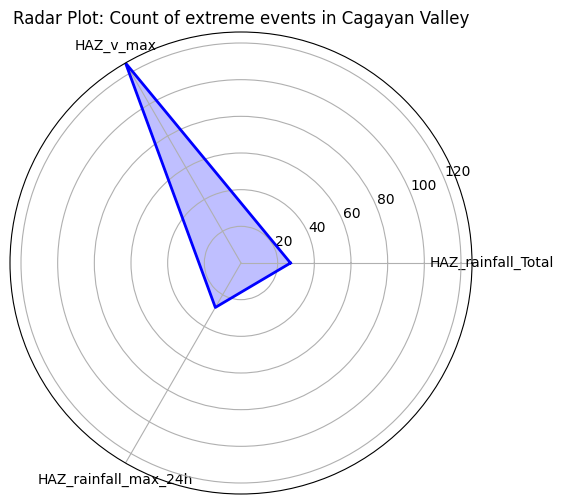

In [92]:
# Filter the DataFrame by a specific 'Cordillera Administrative Region Cagayan Valley'

region_II_HZ =  base_inc_Reg_Haz_DF[base_inc_Reg_Haz_DF['region'] == 'Region II (Cagayan Valley)']

# get the mean across the variables
region_II_Outliers = count_outliers(region_II_HZ[viz_haz_columns])

num_vars = len(viz_haz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_II_Outliers.iloc[0].tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_haz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_II_Outliers.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Count of extreme events in Cagayan Valley')


# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'N-region_II_haz_rad.png'
output_path_region_II_haz_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_region_II_haz_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

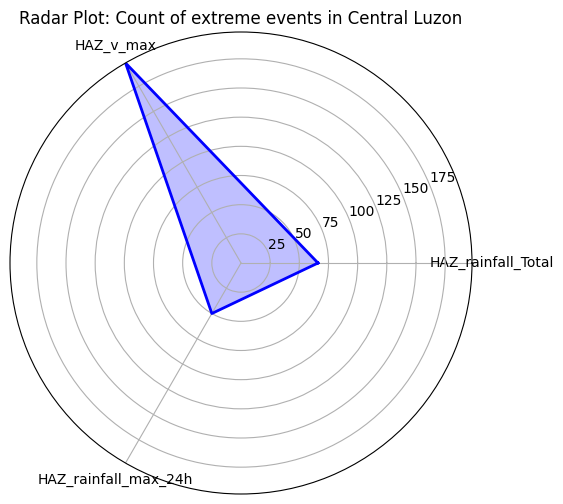

In [94]:
# Filter the DataFrame by a specific 'Cordillera Administrative Region Central Luzon'

region_III_HZ =  base_inc_Reg_Haz_DF[base_inc_Reg_Haz_DF['region'] == 'Region III (Central Luzon)']

# get the mean across the variables
region_III_Outliers = count_outliers(region_III_HZ[viz_haz_columns])

num_vars = len(viz_haz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_III_Outliers.iloc[0].tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_haz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_III_Outliers.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Count of extreme events in Central Luzon')


# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'N-region_III_haz_rad.png'
output_path_region_III_haz_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_region_III_haz_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

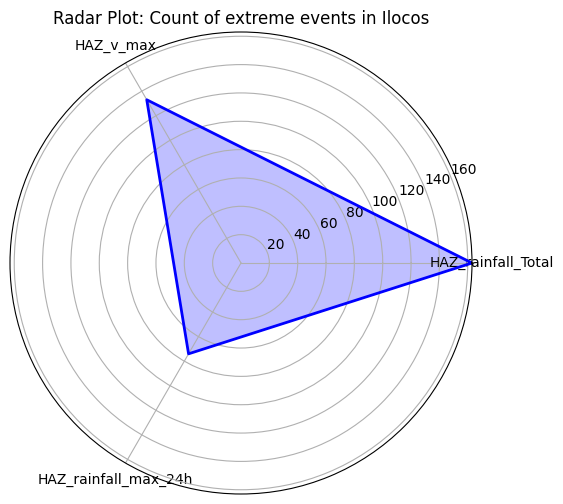

In [96]:
# Filter the DataFrame by a specific 'Cordillera Administrative Region Central Luzon'

region_I_HZ =  base_inc_Reg_Haz_DF[base_inc_Reg_Haz_DF['region'] == 'Region I (Ilocos Region)']

# get the mean across the variables
region_I_Outliers = count_outliers(region_I_HZ[viz_haz_columns])

num_vars = len(viz_haz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_I_Outliers.iloc[0].tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_haz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_I_Outliers.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Count of extreme events in Ilocos')


# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'N-region_I_haz_rad.png'
output_path_region_I_haz_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_region_I_haz_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

### Southern Regions

In [ ]:
region_XII_HZ =  base_inc_Reg_Haz_DF[base_inc_Reg_Haz_DF['region'] == 'Region XII (SOCCSKSARGEN)']

# get the mean across the variables
region_XII_Outliers = count_outliers(region_XII_HZ[viz_columns])

num_vars = len(viz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_XII_Outliers.iloc[0].tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_XII_mean.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot of number of outlier of Hazard events in Region XII (SOCCSKSARGEN)')

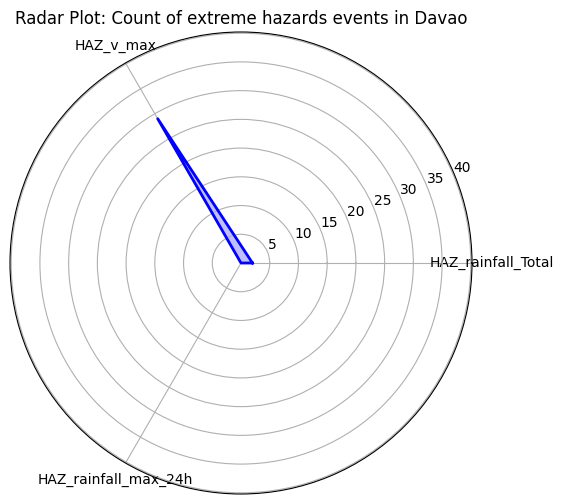

In [106]:
region_XI_HZ =  base_inc_Reg_Haz_DF[base_inc_Reg_Haz_DF['region'] == 'Region XI (Davao Region)']

# get the mean across the variables
region_XI_Outliers = count_outliers(region_XI_HZ[viz_haz_columns])

num_vars = len(viz_haz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_XI_Outliers.iloc[0].tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_haz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_XI_mean.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Count of extreme hazards events in Davao')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'S-region_XI_haz_rad.png'
output_path_region_XI_haz_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_region_XI_haz_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

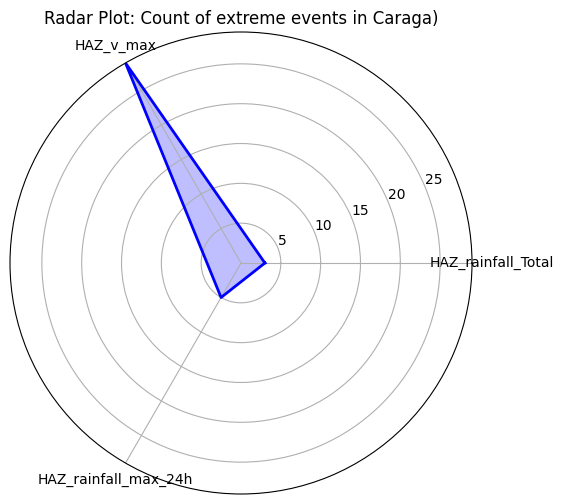

In [114]:
# Filter the DataFrame by a specific 

region_XIII_HZ = base_inc_Reg_Haz_DF[base_inc_Reg_Haz_DF['region'] == 'Region XIII (Caraga)']

# get the mean across the variables
region_XIII_Outlliers = count_outliers(region_XIII_HZ[viz_haz_columns])

num_vars = len(viz_haz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_XIII_Outlliers.iloc[0].tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_haz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_XIII_Outlliers.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Count of extreme events in Caraga)')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'S-region_XIII_haz_rad.png'
output_path_region_XIII_haz_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_region_XIII_haz_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

#### Region XII (SOCCSKSARGEN) - South

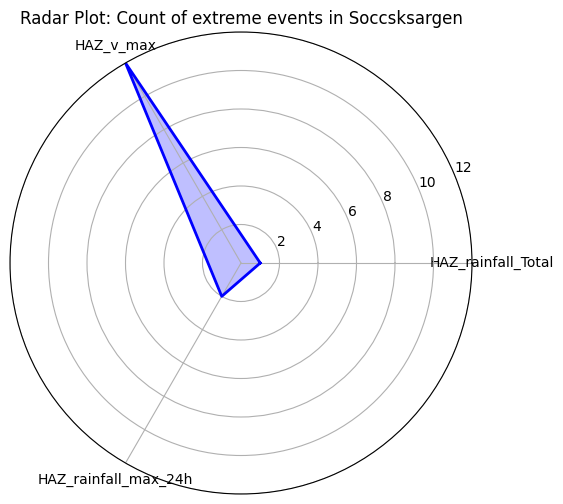

In [112]:
region_XII_HZ =  base_inc_Reg_Haz_DF[base_inc_Reg_Haz_DF['region'] == 'Region XII (SOCCSKSARGEN)']

# get the mean across the variables
region_XII_Outliers = count_outliers(region_XII_HZ[viz_haz_columns])

num_vars = len(viz_haz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_XII_Outliers.iloc[0].tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_haz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_XII_Outliers.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Count of extreme events in Soccsksargen')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'S-region_XII_haz_rad.png'
output_path_region_XII_haz_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_region_XII_haz_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

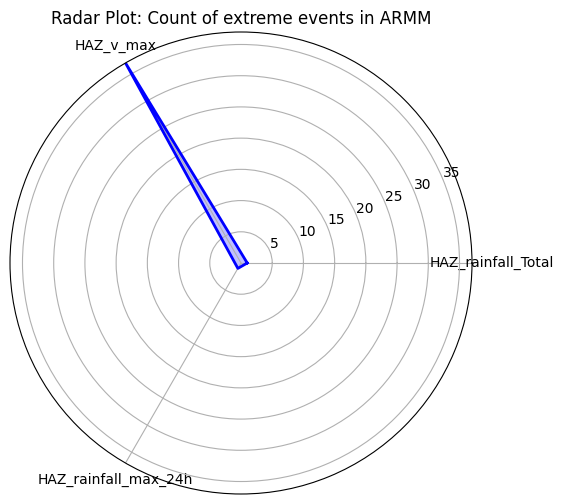

In [116]:
region_ARMM_HZ =  base_inc_Reg_Haz_DF[base_inc_Reg_Haz_DF['region'] == 'Autonomous Region in Muslim Mindanao (ARMM)']

# get the mean across the variables
region_ARMM_Outliers = count_outliers(region_ARMM_HZ[viz_haz_columns])

num_vars = len(viz_haz_columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add the first mean value to the end to close the loop
values = region_ARMM_Outliers.iloc[0].tolist()
values += values[:1]

# Plot the radar chart
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(viz_haz_columns)

# Set the range for the radar chart (you can customize this based on your data)
ax.set_ylim(0, region_ARMM_Outliers.max().max())  # Adjust the upper limit according to your data

# Add a title
plt.title('Radar Plot: Count of extreme events in ARMM')

# Define the output directory and file path
output_directory = '/Users/masinde/Projects/causal-fairness-Philippines-drrm/graphs'
output_file = 'S-region_ARMM_haz_rad.png'
output_path_region_ARMM_haz_rad = os.path.join(output_directory, output_file)

# Save the figure as a PNG with 300 DPI
plt.savefig(output_path_region_ARMM_haz_rad, dpi=300, format='png')

# Show the plot (optional)
plt.show()

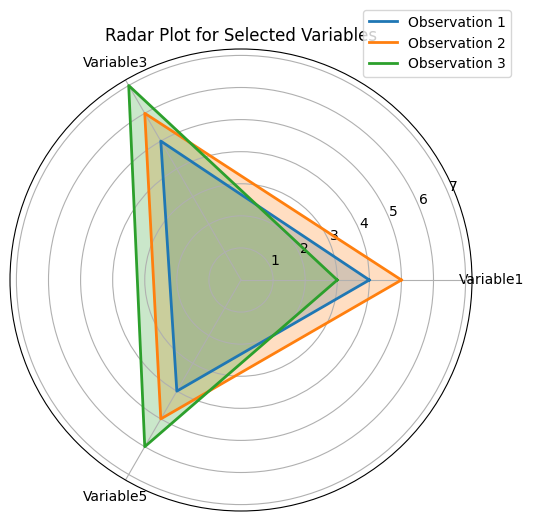

In [212]:
# Sample DataFrame with multiple variables
data = {
    'Variable1': [4, 5, 3],
    'Variable2': [2, 3, 4],
    'Variable3': [5, 6, 7],
    'Variable4': [3, 4, 2],
    'Variable5': [4, 5, 6],
    'Variable6': [5, 3, 4]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Select specific columns you want to plot
selected_columns = ['Variable1', 'Variable3', 'Variable5']

# Filter the DataFrame to only include the selected columns
df_selected = df[selected_columns]

# Number of variables (axes) we are plotting
num_vars = len(df_selected.columns)

# Compute angle for each axis (we divide the plot by the number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by appending the start to the end
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Function to plot radar chart for a row in the DataFrame
def plot_radar(values, label):
    values += values[:1]  # Add the first value to the end to close the loop
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, label=label, linewidth=2)

# Plot each row (observation) from the filtered DataFrame
for i, row in df_selected.iterrows():
    plot_radar(row.tolist(), label=f'Observation {i + 1}')

# Set labels for each axis based on the selected columns
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df_selected.columns)

# Add a title and legend
plt.title('Radar Plot for Selected Variables')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()

## Density plots for Hazard Variables

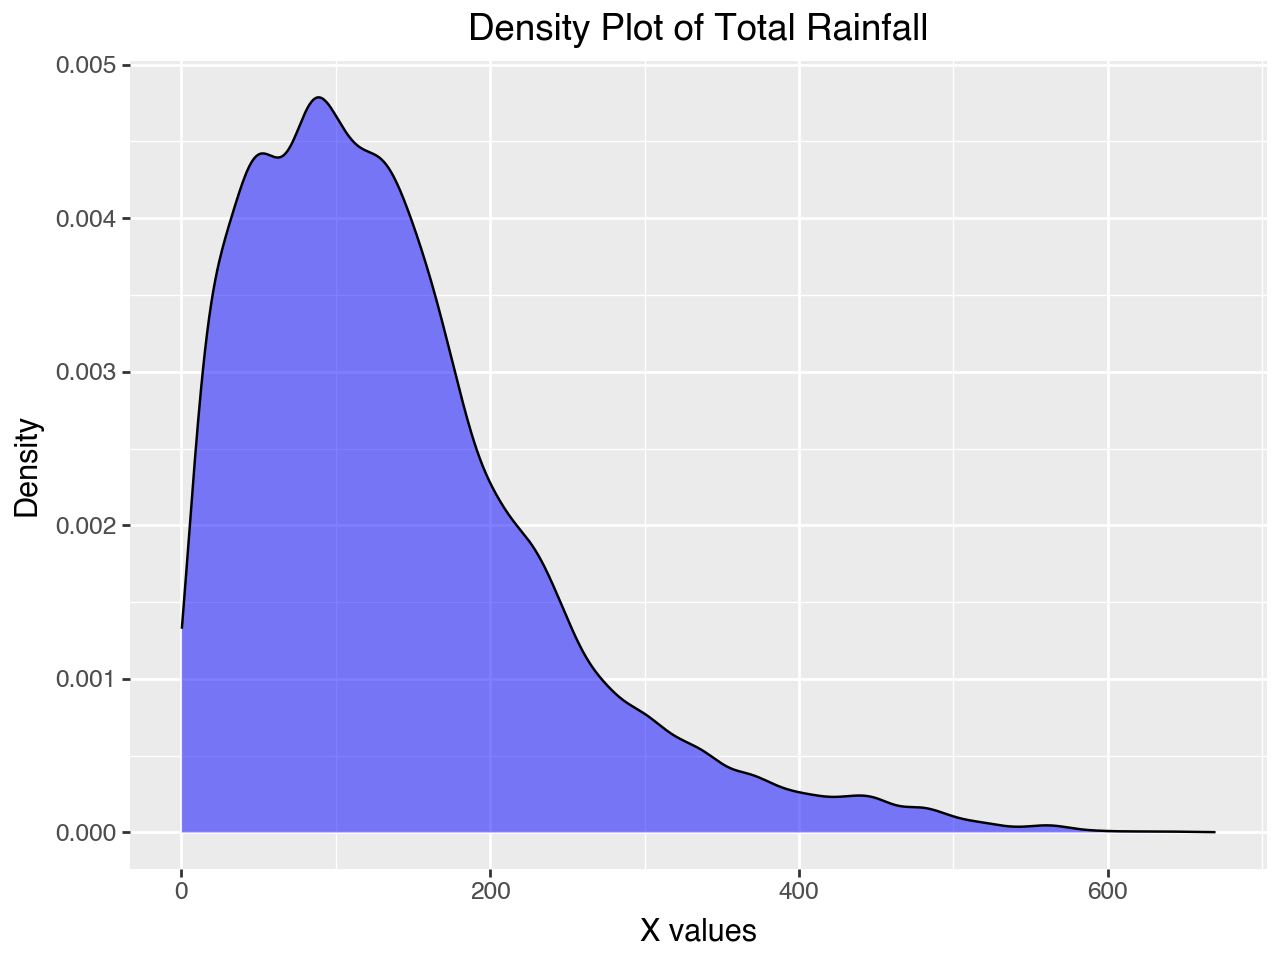

In [69]:
# Density plot Total raifall
# Create the density plot
density_plot = (ggplot(base_inc_reg_DF, aes(x='HAZ_rainfall_Total')) +
                geom_density(fill="blue", alpha=0.5) +
                ggtitle("Density Plot of Total Rainfall") +
                xlab("X values") +
                ylab("Density"))

# Print the plot
density_plot.show()

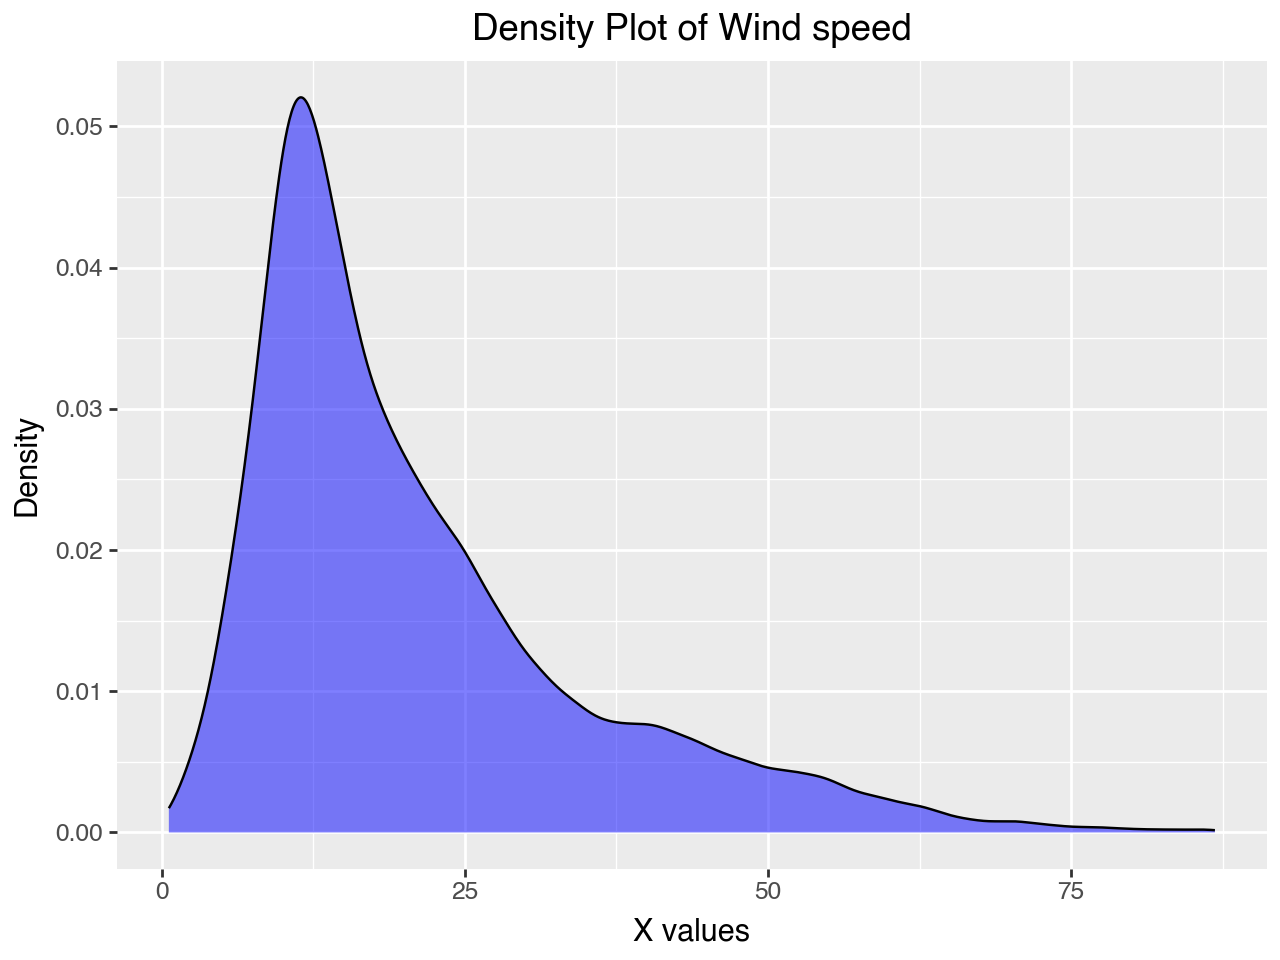

In [71]:
# Density plot Total raifall
# Create the density plot
density_plot = (ggplot(base_inc_reg_DF, aes(x='HAZ_v_max')) +
                geom_density(fill="blue", alpha=0.5) +
                ggtitle("Density Plot of Wind speed") +
                xlab("X values") +
                ylab("Density"))

# Print the plot
density_plot.show()

Obviously the hazard variables would be skewed in distribution because these are extreme events. Perhaps a better way of comparing between regions is to count the number of observations that for the variables that are outliers. So we compare the number of outliers between regions?

In [57]:
selected_columns

['HAZ_rainfall_Total', 'HAZ_v_max', 'HAZ_rainfall_max_24h', 'region']

In [74]:
2 * 2

4